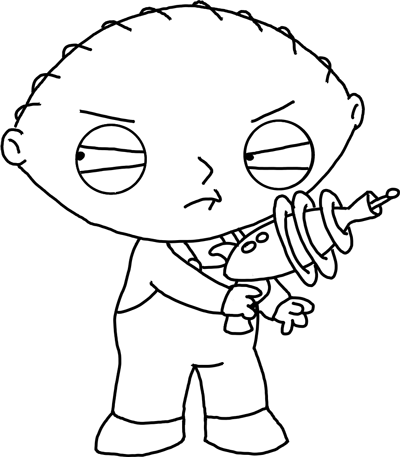

In [11]:
using ImageMagick, Images
download("https://www.drawinghowtodraw.com/stepbystepdrawinglessons/wp-content/uploads/2010/11/finished-bw-Stewie-Toy-Gun.png", "stewie.png")
img = load("stewie.png")